# Predicción de Deserción Estudiantil en la Universidad

Utilizando el Dataset: **Predict Students' Dropout and Academic Success**. Este dataset fue publicado en el UCI Machine Learning Repository en 2022. Fue desarrollado por investigadores interesados en la educación superior, con origen en Portugal. Contiene datos sobre estudiantes universitarios recopilados al momento de la inscripción. El dataset esta conformado por **37 columnas** y **4424 ejemplos** y proporciona una amplia variedad de datos sociodemográficos y académicos de estudiantes, útiles para diferentes tipos de análisis. 


## **Contexto del Problema**

### **Comprensión del Contexto**

El problema se encuentra en el ámbito de la educación superior, donde las instituciones buscan optimizar la gestión de sus estudiantes. El objetivo es comprender cómo los factores académicos, socioeconómicos y personales afectan la continuidad y el éxito de los estudiantes en sus programas educativos. 

En este contexto, el dataset permite identificar patrones que relacionan características de los estudiantes (edad, educación previa, situación financiera) con su desempeño académico. Una comprensión clara de estos factores puede ayudar a las universidades a diseñar estrategias más efectivas para apoyar a los estudiantes.

### **Identificación del Problema**

**Pregunta clave:**
¿Cuáles son las características que influyen en la continuidad y el desempeño académico de los estudiantes?

**Delimitación del alcance:**
- Se abordarán: Factores personales, socioeconómicos y académicos presentes en el dataset.
- No se incluirán: Datos externos más allá del dataset, como información detallada sobre programas específicos o interacciones docentes.

Se busca construir un modelo que permita analizar los datos de los estudiantes y generar insights útiles, pero no se espera intervenir directamente en las políticas educativas ni recopilar información adicional no presente en el dataset.

### **Determinación de Objetivos**

**Objetivos principales:**
- Identificar patrones asociados con la deserción estudiantil.
- Predecir con precisión si un estudiante continuará, desertará o se graduará.
- Priorizar el análisis de características con mayor impacto en la predicción.

**Métricas de éxito:**
- **Precisión**: ≥ 85% en las predicciones del modelo.
- **F1-score**: ≥ 80% para cada categoría (deserción, inscripción, graduación).
- **Tasa de falsos positivos**: < 10% en la categoría de deserción, ya que identificar falsos riesgos podría llevar a intervenciones innecesarias.

### **Audiencia y Usuarios**

El sistema estará dirigido a:
- **Instituciones educativas**: Administradores y responsables de políticas academicas.
- **Consejeros académicos**: Profesionales que trabajan directamente con estudiantes y necesitan información clara sobre sus riesgos y necesidades.
- **Estudiantes**: Para identificar posibles áreas de mejora y recibir apoyo personalizado.

Necesidades específicas:
- Información clara y accesible para los administradores sobre los factores de riesgo de los estudiantes.
- Herramientas de predicción que sean fácilmente integrables en los sistemas existentes.

### **Limitaciones y Restricciones**

1. **Recursos**:
   - Capacidad computacional: Aunque los recursos con los que se cuentan son limitados, se espera que sean suficientes para el análisis propuesto dada la escala del dataset.
   - Presupuesto: Se utilizarán herramientas y servicios gratuitos.

2. **Requisitos de tiempo**:
   - Se busca un modelo funcional en un plazo razonable para evaluar resultados preliminares. Es decir, no se considerarán enfoques que requieran largos tiempos de entrenamiento sin un impacto claro en el rendimiento. Aunque dado el tamaño del dataset, se espera que el entrenamiento de los modelos no sea excesivamente costoso en términos de tiempo.

3. **Calidad de los datos**:
   - Datos faltantes: Según la descripción del dataset, no se menciona la presencia de datos faltantes, pero se realizará una verificación inicial.
   - Desbalanceo: La distribución de clases en la variable objetivo no es uniforme, lo que puede afectar la capacidad del modelo para predecir con precisión las clases minoritarias.

4. **Restricciones técnicas**:
   - Infraestructura informática: Se emplearán entornos estándar de Python y Jupyter Notebook.
   - Algoritmos: Se experimentará con algoritmos de clasificación comunes y redes neuronales.



### **Recolección de Datos**

**Disponibilidad:**
El dataset ya se encuentra disponible en el UCI Machine Learning Repository, una fuente confiable y ampliamente utilizada en proyectos de Machine Learning. 

**Fuente:**
- Origen: Datos recolectados por instituciones educativas en Portugal, provenientes de registros administrativos de estudiantes.
- Formato: Archivo CSV separado por punto y coma.
- Licencia: Uso público con fines educativos y de investigación.

- Link: [Predict Students' Dropout and Academic Success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [1]:
import pandas as pd

df = pd.read_csv('data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### **Definición de Variables**

Las características seleccionadas para este modelo se basan en su relevancia para describir el desempeño académico y la probabilidad de continuidad del estudiante. Estas son las más destacadas:

- **Demográficas y personales**:
  - `Gender`: Género del estudiante.
  - `Age`: Edad al momento de la inscripción.
  - `Nationality`: Nacionalidad.
  - `Marital_status`: Estado civil.
  - `Displaced`: Si vive fuera de su lugar de origen.
  - `International`: Si es un estudiante internacional.

- **Socioeconómicas**:
  - `Mother_qualification`: Nivel educativo de la madre.
  - `Father_qualification`: Nivel educativo del padre.
  - `Mother_occupation`: Ocupación de la madre.
  - `Father_occupation`: Ocupación del padre.
  - `Scholarship_holder`: Si recibe una beca.
  - `Debtor`: Si tiene deudas pendientes.
  - `Tuition_fees_up_to_date`: Si las cuotas están al día.

- **Académicas**:
  - `Previous_qualification`: Nivel educativo previo.
  - `Previous_qualification_grade`: Calificación previa.
  - `Curricular_units_1st_sem_enrolled`: Unidades inscritas en el primer semestre.
  - `Curricular_units_1st_sem_approved`: Unidades aprobadas en el primer semestre.
  - `Curricular_units_1st_sem_grade`: Promedio de calificaciones del primer semestre.
  - `Curricular_units_2nd_sem_enrolled`: Unidades inscritas en el segundo semestre.
  - `Curricular_units_2nd_sem_approved`: Unidades aprobadas en el segundo semestre.
  - `Curricular_units_2nd_sem_grade`: Promedio de calificaciones del segundo semestre.

- **Económicas del contexto**:
  - `Unemployment_rate`: Tasa de desempleo nacional.
  - `Inflation_rate`: Tasa de inflación.
  - `GDP`: Producto Interno Bruto.

**Variable objetivo (target o label):**
La variable objetivo es `Target`, que clasifica al estudiante en una de las siguientes categorías:
- _Dropout_ : El estudiante abandonó el programa.
- _Enrolled_ : El estudiante sigue inscrito.
- _Graduate_ : El estudiante completó el programa.


### **Tipos de Datos**

Los tipos de datos presentes en el dataset son:

- **Numéricos**: `Age`, `Previous_qualification_grade`, `GDP`, `Unemployment_rate`.

- **Categóricos**: `Gender`, `Nationality`, `Marital_status`, `Previous_qualification`.

- **Binarios**: `Displaced`, `International`, `Debtor`, `Scholarship_holder`.



### Exploracion Inicial del Dataset

Para comenzar, realizaremos una exploración inicial del dataset para comprender mejor la estructura de los datos y las características presentes.

In [2]:
display(df.describe())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


##### Tipos de dato

In [2]:
numericas = [
    'Application order', 
    'Previous qualification (grade)', 
    'Admission grade', 
    'Age at enrollment', 
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)', 
    'Unemployment rate',
    'Inflation rate', 
    'GDP',
]

categoricas = [
    'Marital status', 
    'Application mode', 
    'Course', 
    'Previous qualification', 
    'Nacionality',
    'Mother\'s qualification', 
    'Father\'s qualification',
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Target'
]

binarias = [
    'Daytime/evening attendance\t',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

print(f"Variables numéricas: {len(numericas)}")
print(f"Variables categóricas: {len(categoricas)}")
print(f"Variables binarias: {len(binarias)}")

Variables numéricas: 19
Variables categóricas: 10
Variables binarias: 8


### **Limpieza y Transformación de Datos**

#### Limpieza:
- **Valores faltantes**:
   Identificar y tratar las celdas vacías.
- **Duplicados**:
   Eliminar entradas duplicadas para evitar sesgos o redundancia.

In [4]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print('No hay valores faltantes')
else:
    print('Valores faltantes:')
    print(missing_values)


# Identificar filas duplicadas
duplicated_rows = df[df.duplicated()]
print(f'Filas duplicadas: {len(duplicated_rows)}')

# Identificar columnas duplicadas
duplicated_columns = df.columns[df.T.duplicated()]
print(f'Columnas duplicadas: {len(duplicated_columns)}')

No hay valores faltantes
Filas duplicadas: 0
Columnas duplicadas: 0


#### Transformaciones:
- **Estandarización**:
   Escalar las variables numéricas para que tengan una media de 0 y una desviación estándar de 1.
- **Codificación de variables categóricas**:
   Eliminar, utilizar one-hot encoding, generacion de _dummies_ y label encoding de acuerdo a como sea necesario. (Se llevarán a cabo en la fase de exploración y análisis).
- **Creación de características derivadas**:
   Explorar la posibilidad de generar nuevas características útiles, como la relación entre unidades inscritas y aprobadas. (Se llevará a cabo posteriormente si el análisis lo sugiere).

In [5]:
print("Padres:")
print(f'''Cantidad de niveles de educacion diferentes: {len(df["Father's qualification"].value_counts())}''')
print(f'''Cantidad de ocupaciones diferentes: {len(df["Father's occupation"].value_counts())}''')

print("\nMadres:")
print(f'''Cantidad de niveles de educacion diferentes: {len(df["Mother's qualification"].value_counts())}''')
print(f'''Cantidad de ocupaciones diferentes: {len(df["Mother's occupation"].value_counts())}''')


Padres:
Cantidad de niveles de educacion diferentes: 34
Cantidad de ocupaciones diferentes: 46

Madres:
Cantidad de niveles de educacion diferentes: 29
Cantidad de ocupaciones diferentes: 32


Desde la fuente se sabe que la tabla de valores de niveles de educacion es
<details>
<summary>Mostrar tabla</summary>

| Number | Level of Education                                            |
|--------|--------------------------------------------------------------|
| 1      | Secondary Education - 12th Year of Schooling or Eq.          |
| 2      | Higher Education - Bachelor's Degree                         |
| 3      | Higher Education - Degree                                    |
| 4      | Higher Education - Master's                                  |
| 5      | Higher Education - Doctorate                                 |
| 6      | Frequency of Higher Education                                |
| 9      | 12th Year of Schooling - Not Completed                       |
| 10     | 11th Year of Schooling - Not Completed                       |
| 11     | 7th Year (Old)                                               |
| 12     | Other - 11th Year of Schooling                               |
| 13     | 2nd year complementary high school course                    |
| 14     | 10th Year of Schooling                                       |
| 18     | General commerce course                                      |
| 19     | Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.     |
| 20     | Complementary High School Course                             |
| 22     | Technical-professional course                                |
| 25     | Complementary High School Course - not concluded             |
| 26     | 7th year of schooling                                        |
| 27     | 2nd cycle of the general high school course                  |
| 29     | 9th Year of Schooling - Not Completed                        |
| 30     | 8th year of schooling                                        |
| 31     | General Course of Administration and Commerce                |
| 33     | Supplementary Accounting and Administration                  |
| 34     | Unknown                                                     |
| 35     | Can't read or write                                          |
| 36     | Can read without having a 4th year of schooling              |
| 37     | Basic education 1st cycle (4th/5th year) or equiv.           |
| 38     | Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.       |
| 39     | Technological specialization course                          |
| 40     | Higher education - degree (1st cycle)                        |
| 41     | Specialized higher studies course                            |
| 42     | Professional higher technical course                         |
| 43     | Higher Education - Master (2nd cycle)                        |
| 44     | Higher Education - Doctorate (3rd cycle)                     |

</details>



de donde se puede ver que los números asignados a cada nivel de educación no corresponden a un orden lógico, por lo que se procedera a utilizar un LLM obtener una lista ordenada y a convertir las variables `Previous_qualification`, `Mother_qualification` y `Father_qualification` a variables ordinales.

In [3]:
education_order_dict = {
    35 : 1,  # Can't read or write
    36 : 2,  # Can read without having a 4th year of schooling
    37 : 3,  # Basic education 1st cycle (4th/5th year) or equiv.
    38 : 4,  # Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
    26 : 5,  # 7th year of schooling
    11 : 6,  # 7th Year (Old)
    30 : 7,  # 8th year of schooling
    29 : 8,  # 9th Year of Schooling - Not Completed
    19 : 9,  # Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    15 : 10,  # 10th year of schooling - not completed
    14 : 11,  # 10th Year of Schooling
    10 : 12,  # 11th Year of Schooling - Not Completed
    12 : 13,  # Other - 11th Year of Schooling
    13 : 14,  # 2nd year complementary high school course
    27 : 15,  # 2nd cycle of the general high school course
    9 : 16,   # 12th Year of Schooling - Not Completed
    1 : 17,   # Secondary Education - 12th Year of Schooling or Eq.
    20 : 18,  # Complementary High School Course
    25 : 19,  # Complementary High School Course - not concluded
    18 : 20,  # General commerce course
    31 : 21,  # General Course of Administration and Commerce
    33 : 22,  # Supplementary Accounting and Administration
    22 : 23,  # Technical-professional course
    2 : 24,   # Higher Education - Bachelor's Degree
    3 : 25,   # Higher Education - Degree
    40 : 26,  # Higher education - degree (1st cycle)
    41 : 27,  # Specialized higher studies course
    42 : 28,  # Professional higher technical course
    4 : 29,   # Higher Education - Master's
    43 : 30,  # Higher Education - Master (2nd cycle)
    5 : 31,   # Higher Education - Doctorate
    44 : 32,  # Higher Education - Doctorate (3rd cycle)
    39 : 33,  # Technological specialization course
    6 : 17,   # Frequency of Higher Education
    34 : 17   # Unknown
}

df["Father's qualification"] = df["Father's qualification"].map(education_order_dict)
df["Mother's qualification"] = df["Mother's qualification"].map(education_order_dict)
df["Previous qualification"] = df["Previous qualification"].map(education_order_dict)

Tambien desde la fuente, se sabe que la tabla de valores de ocupaciones es

<details>
<summary>Mostrar tabla</summary>

| Code | Description                                                                                                   |
|------|---------------------------------------------------------------------------------------------------------------|
| 0    | Student                                                                                                       |
| 1    | Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers    |
| 2    | Specialists in Intellectual and Scientific Activities                                                         |
| 3    | Intermediate Level Technicians and Professions                                                               |
| 4    | Administrative staff                                                                                          |
| 5    | Personal Services, Security and Safety Workers and Sellers                                                   |
| 6    | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                                           |
| 7    | Skilled Workers in Industry, Construction and Craftsmen                                                      |
| 8    | Installation and Machine Operators and Assembly Workers                                                      |
| 9    | Unskilled Workers                                                                                            |
| 10   | Armed Forces Professions                                                                                      |
| 90   | Other Situation                                                                                               |
| 99   | (blank)                                                                                                       |
| 101  | Armed Forces Officers                                                                                        |
| 102  | Armed Forces Sergeants                                                                                       |
| 103  | Other Armed Forces personnel                                                                                 |
| 112  | Directors of administrative and commercial services                                                          |
| 114  | Hotel, catering, trade and other services directors                                                          |
| 121  | Specialists in the physical sciences, mathematics, engineering and related techniques                        |
| 122  | Health professionals                                                                                         |
| 123  | Teachers                                                                                                     |
| 124  | Specialists in finance, accounting, administrative organization, public and commercial relations             |
| 125  | Specialists in information and communication technologies (ICT)                                              |
| 131  | Intermediate level science and engineering technicians and professions                                       |
| 132  | Technicians and professionals, of intermediate level of health                                               |
| 134  | Intermediate level technicians from legal, social, sports, cultural and similar services                     |
| 135  | Information and communication technology technicians                                                         |
| 141  | Office workers, secretaries in general and data processing operators                                         |
| 143  | Data, accounting, statistical, financial services and registry-related operators                             |
| 144  | Other administrative support staff                                                                           |
| 151  | Personal service workers                                                                                     |
| 152  | Sellers                                                                                                      |
| 153  | Personal care workers and the like                                                                           |
| 154  | Protection and security services personnel                                                                   |
| 161  | Market-oriented farmers and skilled agricultural and animal production workers                               |
| 163  | Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence                                    |
| 171  | Skilled construction workers and the like, except electricians                                               |
| 172  | Skilled workers in metallurgy, metalworking and similar                                                     |
| 173  | Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like             |
| 174  | Skilled workers in electricity and electronics                                                              |
| 175  | Workers in food processing, woodworking, clothing and other industries and crafts                            |
| 181  | Fixed plant and machine operators                                                                            |
| 182  | Assembly workers                                                                                            |
| 183  | Vehicle drivers and mobile equipment operators                                                              |
| 191  | Cleaning workers                                                                                            |
| 192  | Unskilled workers in agriculture, animal production, fisheries and forestry                                  |
| 193  | Unskilled workers in extractive industry, construction, manufacturing and transport                         |
| 194  | Meal preparation assistants                                                                                 |
| 195  | Street vendors (except food) and street service providers   

                                                 |
</details>
Cuyo posible ordenamiento obedecería a criterios subjetivos, por lo que los valores serán utilizados tal cual.

##### Estandarización de los datos numéricos

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numericas] = scaler.fit_transform(df[numericas])
df[numericas].describe()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,-1.043971e-16,-3.589654e-16,-9.708930e-16,-1.027910e-16,3.212219e-17,3.533440e-17,9.636656e-17,3.051608e-17,1.718537e-16,9.636656e-18,-3.212219e-18,1.646262e-16,-8.994212e-17,-1.509743e-16,-2.409164e-16,3.212219e-18,-5.460771e-17,1.445498e-16,2.569775e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-1.315309e+00,-2.852337e+00,-2.208378e+00,-8.257782e-01,-3.008131e-01,-2.528560e+00,-1.986068e+00,-1.521257e+00,-2.197102e+00,-1.992730e-01,-2.824423e-01,-2.838337e+00,-2.042630e+00,-1.471527e+00,-1.963489e+00,-1.994410e-01,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-5.540678e-01,-5.773417e-01,-6.269262e-01,-5.621680e-01,-3.008131e-01,-5.123476e-01,-5.501920e-01,-5.516038e-01,7.416267e-02,-1.992730e-01,-2.824423e-01,-5.611611e-01,-5.226824e-01,-8.080500e-01,9.976438e-02,-1.994410e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,-5.540678e-01,3.690696e-02,-6.064208e-02,-4.303628e-01,-3.008131e-01,-1.091051e-01,-7.156661e-02,9.483201e-02,3.396352e-01,-1.992730e-01,-2.824423e-01,-1.057260e-01,-1.603320e-02,1.871653e-01,3.780636e-01,-1.994410e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,2.071732e-01,5.601559e-01,5.401715e-01,2.286628e-01,-3.008131e-01,2.941373e-01,4.070588e-01,4.180499e-01,5.697114e-01,-1.992730e-01,-2.824423e-01,3.497091e-01,4.906160e-01,5.189037e-01,5.955849e-01,-1.994410e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,5.535860e+00,4.351815e+00,4.352230e+00,6.159894e+00,8.172902e+00,7.955743e+00,8.783003e+00,6.882407e+00,1.700182e+00,1.717184e+01,9.622009e+00,7.636671e+00,6.317081e+00,5.163242e+00,1.600935e+00,1.572225e+01,1.739731e+00,1.787974e+00,1.545607e+00


## **Exploración y Análisis de Datos**

### **Exploración**

Se realizará un análisis exploratorio de los datos para identificar patrones, relaciones y características relevantes que puedan influir en la predicción de la deserción estudiantil.

##### Representación gráfica de los datos numéricos

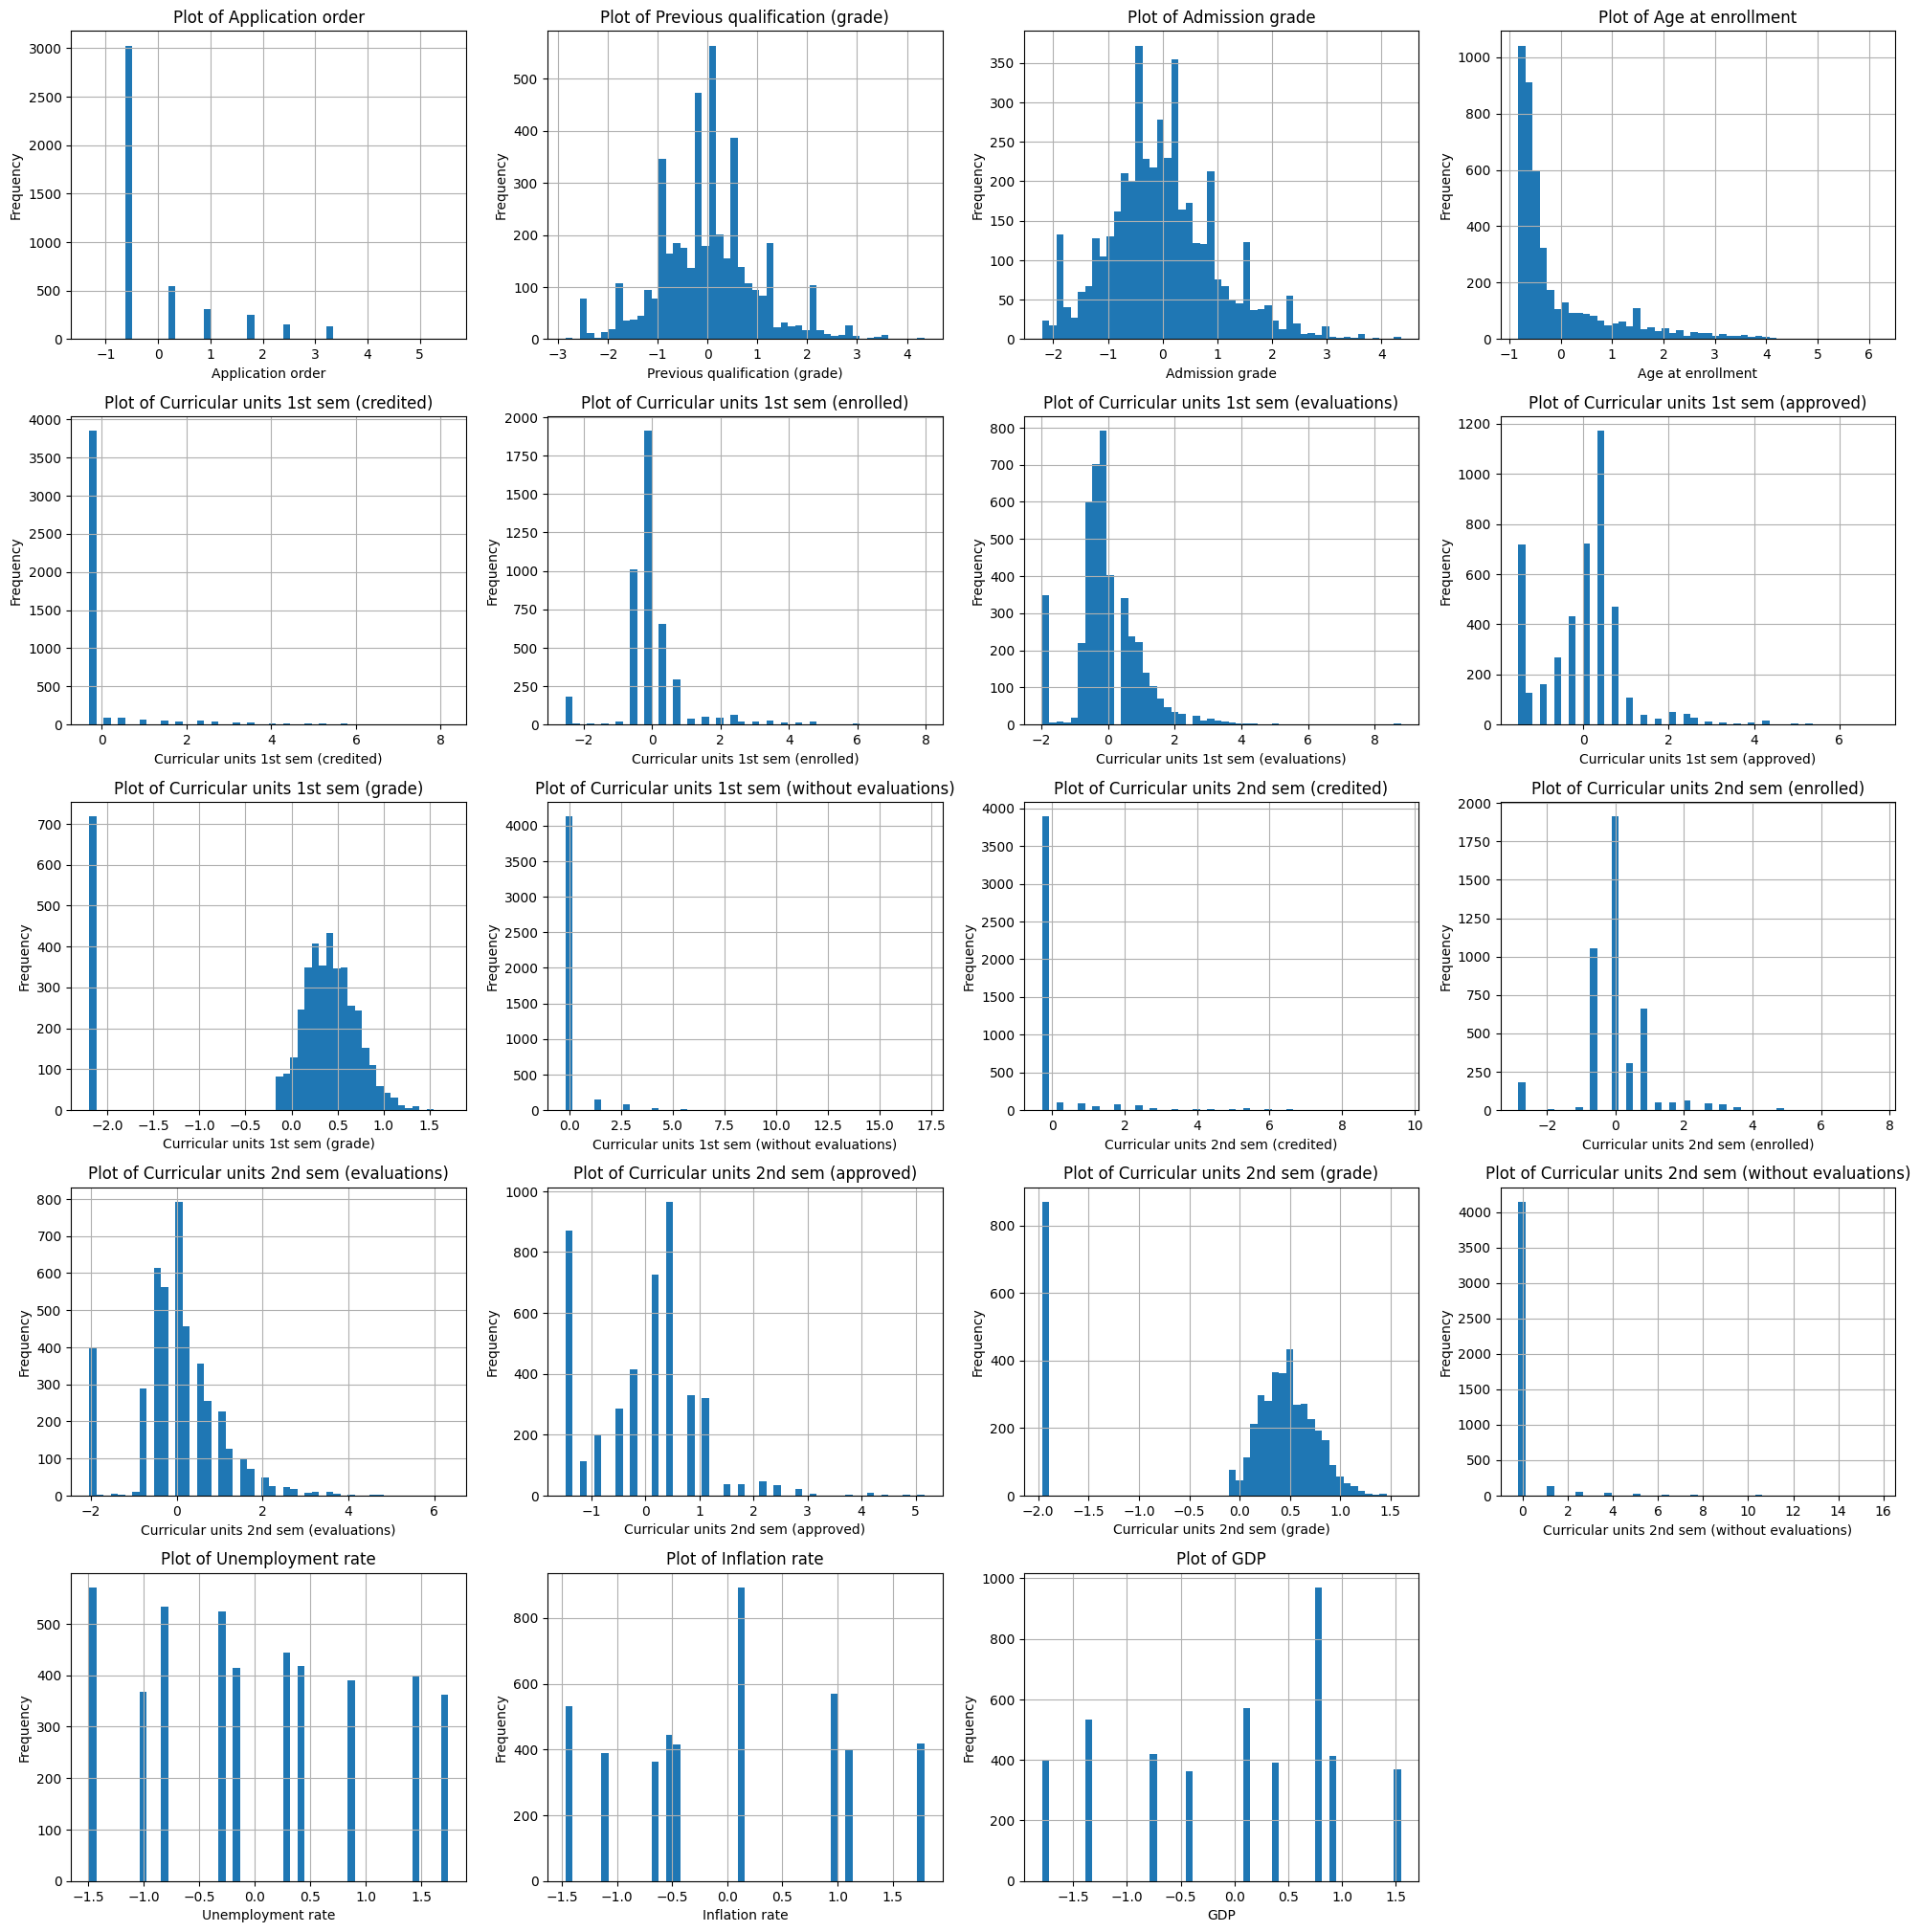

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 40))

axes = axes.flatten()

for i, column in enumerate(numericas):
    df[column].hist(ax=axes[i], bins=50)
    axes[i].set_title(f'Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Representación gráfica de los datos categóricos

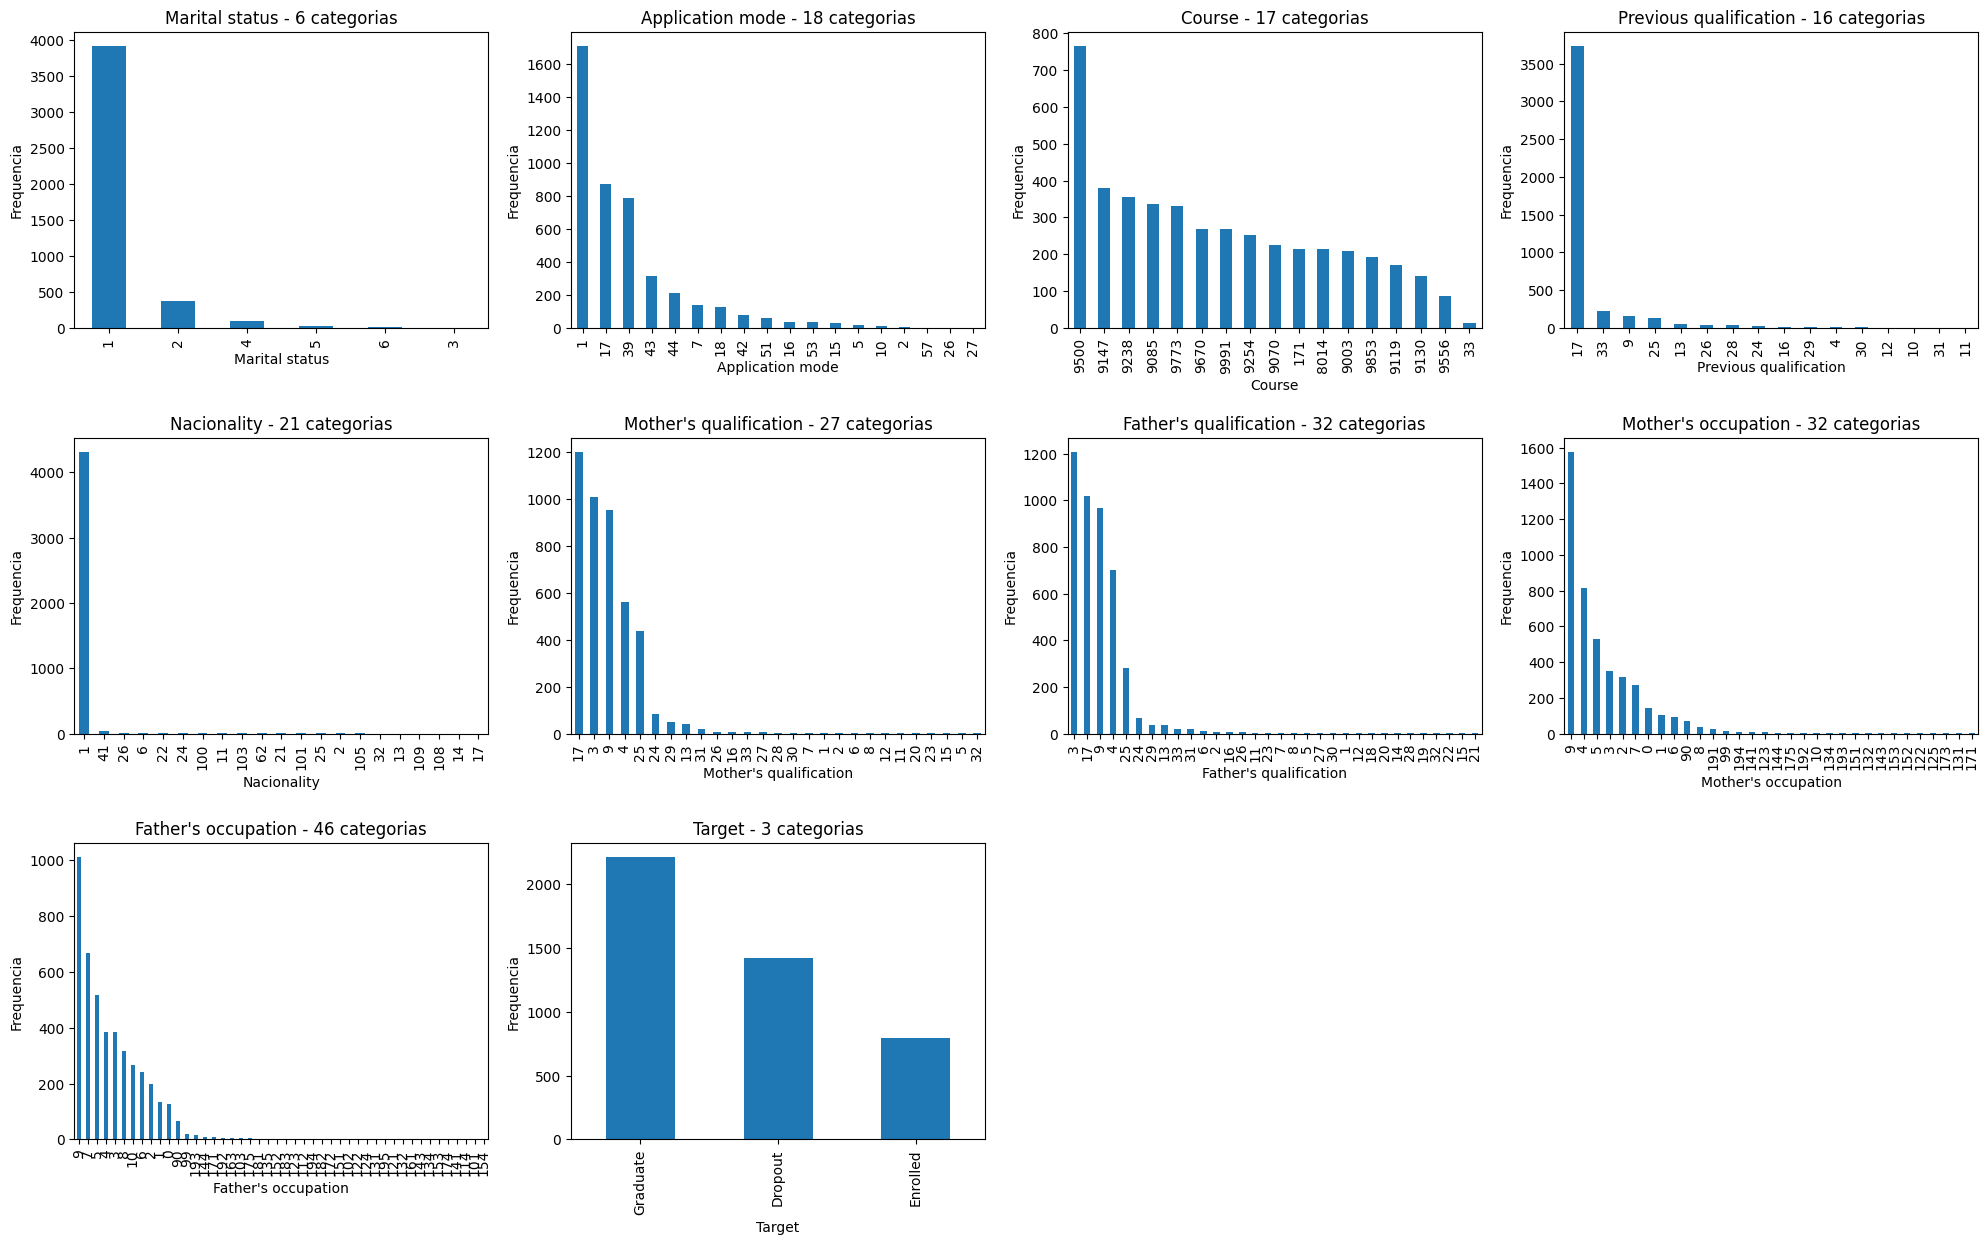

In [17]:
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 40))

axes = axes.flatten()

for i, column in enumerate(categoricas):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} - {len(value_counts)} categorias')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequencia')
    

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Representación gráfica de los datos binarios

/tmp/ipykernel_10157/1851249660.py:10: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/socotroco/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


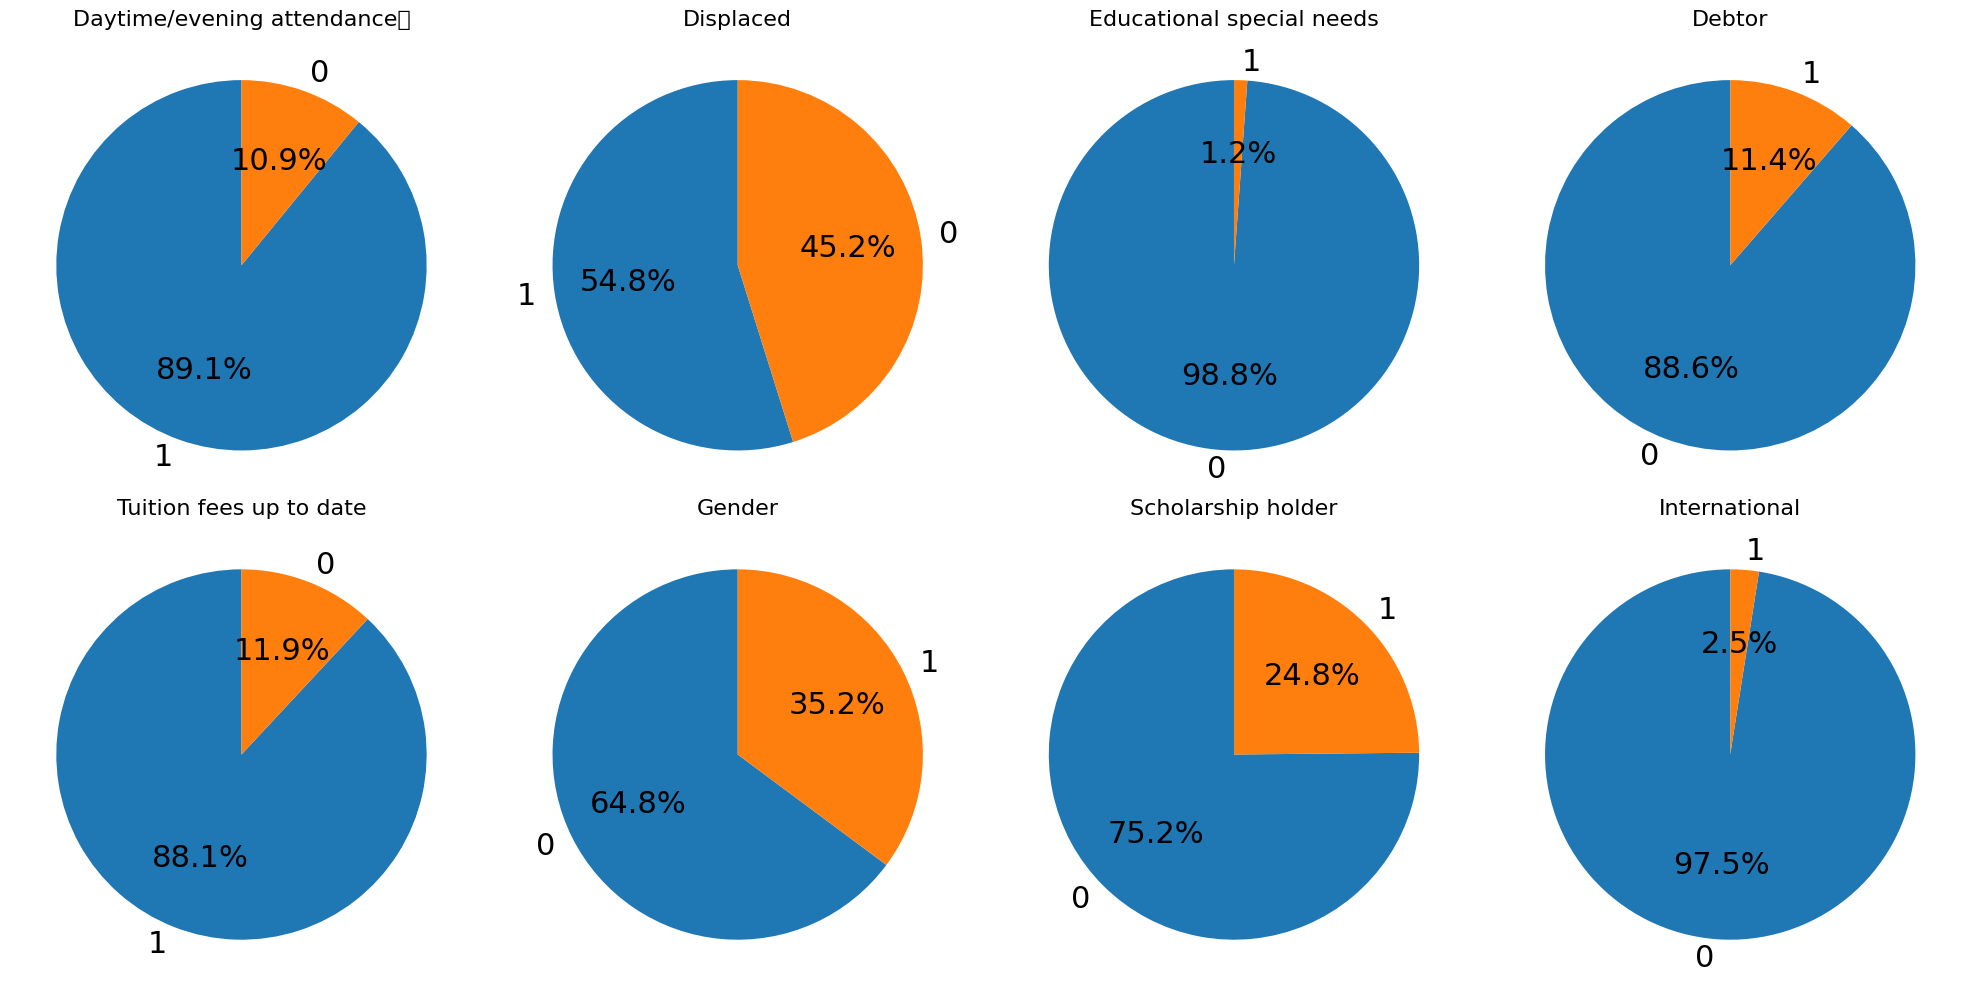

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(binarias):
    value_counts = df[column].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 22})
    axes[i].set_title(f'{column}', fontsize=16)

plt.tight_layout()
plt.show()

##### Matriz de correlación

/home/socotroco/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/socotroco/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


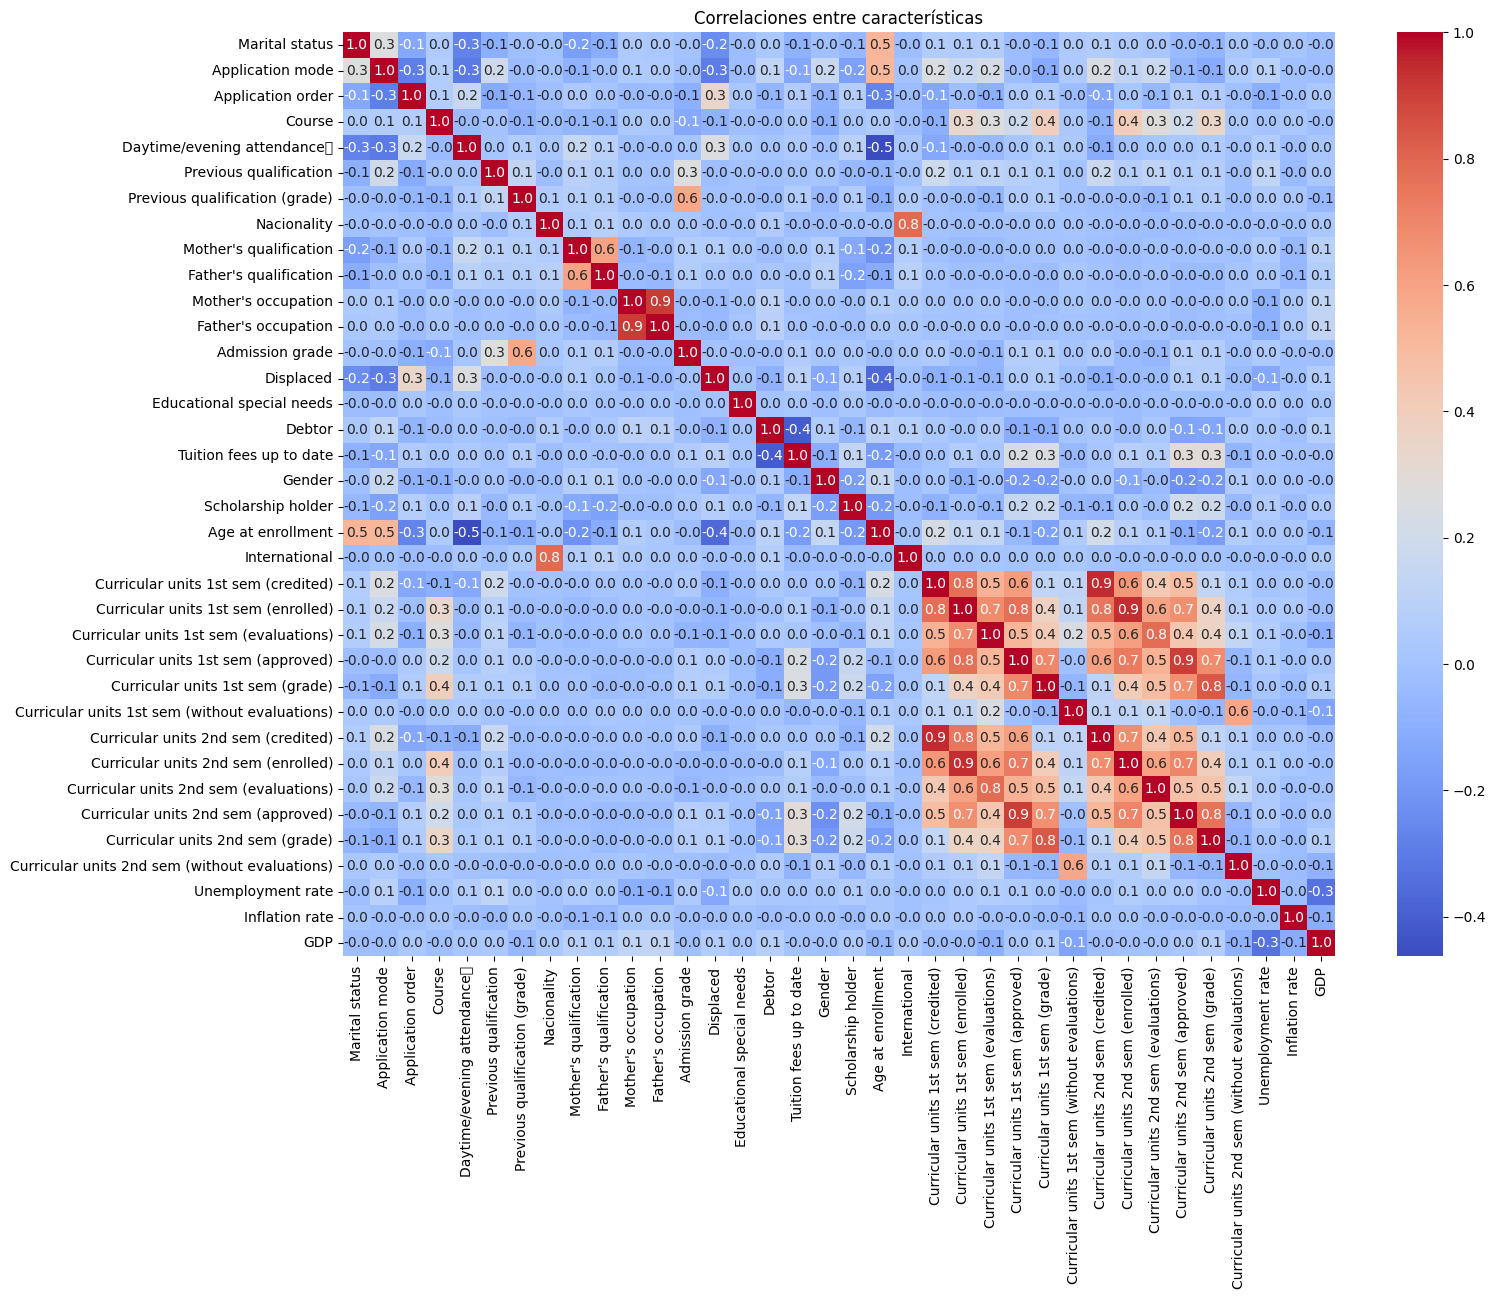

In [19]:
import seaborn as sns

correlation_matrix = df.drop('Target', axis=1).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlaciones entre características')
plt.show()

##### Distribución de la variable objetivo

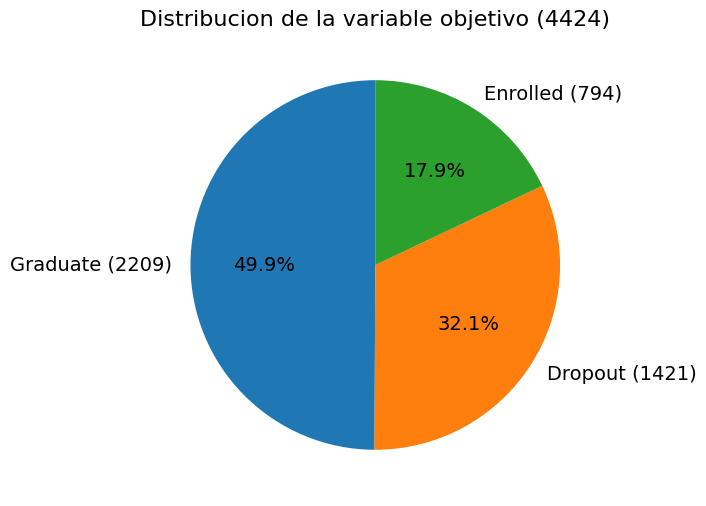

In [20]:
target_counts = df['Target'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(target_counts, labels=[f'{label} ({count})' for label, count in zip(target_counts.index, target_counts)], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title(f"Distribucion de la variable objetivo ({df['Target'].count()})", fontsize=16)
plt.show()

##### Insights

- La mayoría de los estudiantes son de género masculino.

- La edad promedio de los estudiantes es de 23 años.

- >La variable objetivo `Target` tiene tres categorías: _Dropout_, _Enrolled_ y _Graduate_ y **su distribucion no es uniforme**, lo que puede afectar la capacidad del modelo para predecir con precisión las clases minoritarias.

- Se requiere de conversion/eliminacion de los datos de las variables categóricas y binarias con el fin de ser utilizados en algun modelo.

- `Mother's qualification` y `Father's qualification` tienen una alta correlación (0.535), lo que podría indicar una posible relación socioeconómica homogénea dentro de las familias.

- `Age at enrollment` tiene una correlación negativa moderada con `Daytime/evening attendance` (-0.462), lo que refleja que los estudiantes mayores tienden a preferir programas nocturnos.

- `Application mode` y `Age at enrollment` están correlacionados positivamente (0.516), lo que indica que ciertas modalidades de ingreso son más atractivas para estudiantes mayores.

- Las variables relacionadas con el primer semestre están fuertemente correlacionadas con las del segundo semestre, mostrando una continuidad lógica entre períodos académicos.

- Se deben realizar análisis más detallados para identificar patrones y relaciones entre las variables.

### **Análisis**

#### **Análisis de Variables Categóricas y binarias**
Utilizando el calculo de la correlación de Cramer, se obtendrán los valores Chi cuadrado, p y V de Cramer para las variables categóricas.

##### Chi-cuadrado
- **Chi-cuadrado**: Mide el grado de desviación entre las frecuencias observadas y las esperadas en una tabla de contingencia. Por sí solo, el valor de Chi-cuadrado no determina si la relación es significativa; esto depende del p-valor
- **p-valor**: Evalúa la probabilidad de observar un Chi-cuadrado igual o mayor al calculado. Si el p-valor es mayor que 0.05, no se puede concluir que haya asociación significativa entre las variables
- **V de Cramer**: Normaliza el Chi-cuadrado para facilitar la comparación y orporciona una medida de la _fuerza_ de la asociación entre dos variables categóricas.

In [57]:
from scipy.stats import chi2_contingency
import numpy as np

results = []

for cat in categoricas + binarias:
    if cat == 'Target':
        continue
    
    contingency_table = pd.crosstab(df[cat], df['Target'])
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))
    
    results.append({
        'Variable': cat,
        'Chi-cuadrado': chi2,
        'p-valor': p,
        'V de Cramer': cramers_v
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values('V de Cramer', ascending=False))


,Variable,Chi-cuadrado,p-valor,V de Cramer
13,Tuition fees up to date,823.552724,1.471628e-179,0.431458
15,Scholarship holder,409.943055,9.593930e-90,0.304407
2,Course,558.284474,2.316571e-97,0.251192
12,Debtor,259.333220,4.858552e-57,0.242115
14,Gender,233.266432,2.222480e-51,0.229625
1,Application mode,466.513683,1.964657e-77,0.229620
7,Mother's occupation,291.921705,1.630859e-31,0.181640
8,Father's occupation,264.499848,4.515439e-19,0.172898
3,Previous qualification,217.192844,2.867212e-30,0.156675
6,Father's qualification,141.245651,4.041242e-08,0.126347


se procede a remover las variables con un p-valor mayor a 0.05 y V de Cramer menor a 0.1

In [5]:
df.drop(['Nacionality', 'International', 'Educational special needs', 'Daytime/evening attendance\t', 'Marital status'], axis=1, inplace=True)

#### **Análisis de Variables Numéricas**

##### ANOVA y Kruksal-Wallis

Se realizará un análisis de varianza (ANOVA) y la prueba de Kruskal-Wallis para evaluar la relación entre las variables numéricas y la variable objetivo `Target`. se descartarán las variables con un p-valor mayor a 0.05.


In [7]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

results = []

for cat in numericas:
    groups = [df[df['Target'] == v][cat] for v in df['Target'].unique()]
    f_stat, anova_p_value = f_oneway(*groups)
    h_stat, kruskal_p_value = kruskal(*groups)
    results.append({
        'Variable': cat,
        'ANOVA p-value': anova_p_value,
        'Kruskal-Wallis p-value': kruskal_p_value
    })
    
results_df = pd.DataFrame(results)
display(results_df)

,Variable,ANOVA p-value,Kruskal-Wallis p-value
0,Application order,2.955293e-09,5.347474e-11
1,Previous qualification (grade),1.077783e-12,1.488441e-14
2,Admission grade,4.380466e-16,1.251093e-16
3,Age at enrollment,1.138849e-65,3.520194e-82
4,Curricular units 1st sem (credited),3.474158e-04,2.999970e-01
5,Curricular units 1st sem (enrolled),3.272852e-26,2.803949e-54
6,Curricular units 1st sem (evaluations),6.897115e-17,4.244301e-29
7,Curricular units 1st sem (approved),3.649472e-316,0.000000e+00
8,Curricular units 1st sem (grade),2.803052e-269,2.514338e-238
9,Curricular units 1st sem (without evaluations),1.110815e-05,8.309408e-08


In [6]:
df.drop('GDP', axis=1, inplace=True)

### **Características Derivadas**

Se observó que las variables relacionadas con el primer y segundo semestre están altamente correlacionadas. Por lo tanto, se explorará la posibilidad de crear características derivadas que resuman el desempeño académico a lo largo de los dos semestres.

In [132]:
test = df.copy()

test['approved/enrolled 1st sem'] = (test['Curricular units 1st sem (approved)'] - test['Curricular units 1st sem (credited)']) / (test['Curricular units 1st sem (enrolled)'] - test['Curricular units 1st sem (credited)'])

test['approved/enrolled 2nd sem'] = (test['Curricular units 2nd sem (approved)'] - test['Curricular units 2nd sem (credited)']) / (test['Curricular units 2nd sem (enrolled)'] - test['Curricular units 2nd sem (credited)'])

test['average approved'] = (test['approved/enrolled 1st sem'] + test['approved/enrolled 2nd sem'])/2

In [133]:
test = test.drop(['Curricular units 1st sem (approved)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'approved/enrolled 1st sem', 'approved/enrolled 2nd sem'], axis=1)

              precision    recall  f1-score   support

     Dropout       0.79      0.70      0.74       284
    Enrolled       0.54      0.30      0.39       159
    Graduate       0.75      0.92      0.82       442

    accuracy                           0.74       885
   macro avg       0.69      0.64      0.65       885
weighted avg       0.72      0.74      0.72       885



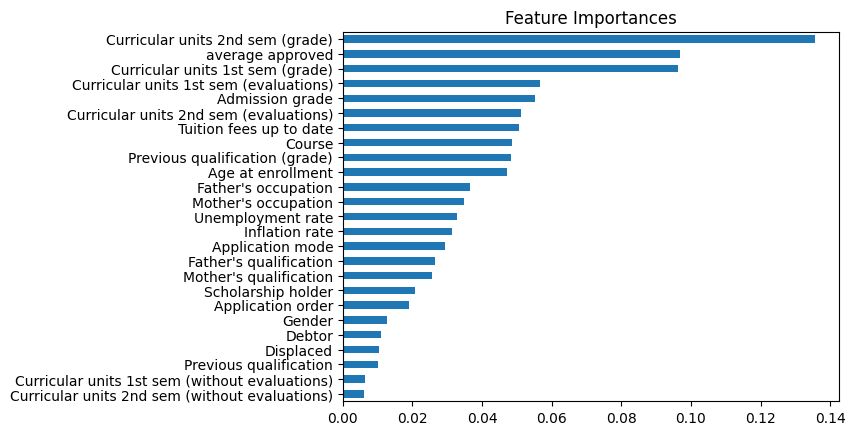

In [79]:
from sklearn.model_selection import train_test_split


X = test.drop('Target', axis=1)
# X = pd.read_csv('data.csv', sep=';').drop(['Target'], axis=1)
y = test['Target']
# y = y.apply(lambda x: 1 if x == 'Dropout' else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Print the 10 most influential features
top_10_features = feature_importances.sort_values(ascending=False).head(10)

Number of components needed for 99% variance: 23


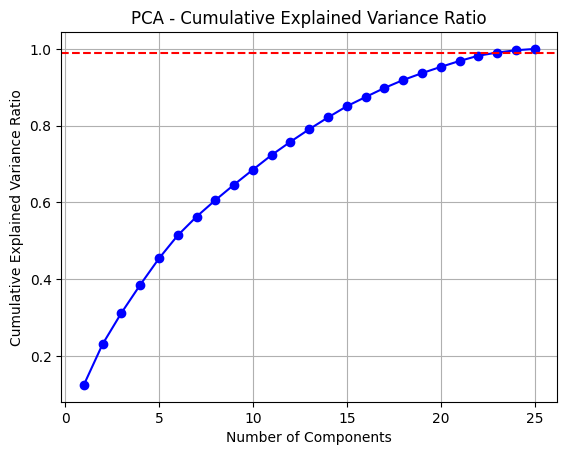

In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = test.drop('Target', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find number of components needed for 99% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print(f"Number of components needed for 99% variance: {n_components}")

# Plot explained variance ratio
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [134]:
# Codificacion de labels de Target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test['Target'] = label_encoder.fit_transform(df['Target'])
test['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
sample_weights = np.ones(len(y_train))
for idx, label in enumerate(y_train):
    sample_weights[idx] = class_weights[label]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into features and target
X = test.drop('Target', axis=1)
y = test['Target']


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ensure the training and test data have the same proportion of target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'The accuracy of the model is: {regressor.score(X_test, y_test)}')

Mean Squared Error: 0.7694915254237288


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Predict the target values for the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7378531073446327
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       284
           1       0.54      0.30      0.39       159
           2       0.75      0.92      0.82       442

    accuracy                           0.74       885
   macro avg       0.69      0.64      0.65       885
weighted avg       0.72      0.74      0.72       885



In [100]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.5615819209039548
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       284
           1       0.30      0.23      0.26       159
           2       0.67      0.68      0.68       442

    accuracy                           0.56       885
   macro avg       0.49      0.49      0.49       885
weighted avg       0.55      0.56      0.56       885



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Predict the target values for the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb}')
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.7231638418079096
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       284
           1       0.42      0.48      0.45       159
           2       0.80      0.83      0.82       442

    accuracy                           0.72       885
   macro avg       0.67      0.67      0.67       885
weighted avg       0.73      0.72      0.73       885



In [135]:
test.columns

Index(['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'Target', 'average approved'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       284
           1       0.55      0.26      0.35       159
           2       0.75      0.93      0.83       442

    accuracy                           0.74       885
   macro avg       0.70      0.64      0.64       885
weighted avg       0.73      0.74      0.72       885



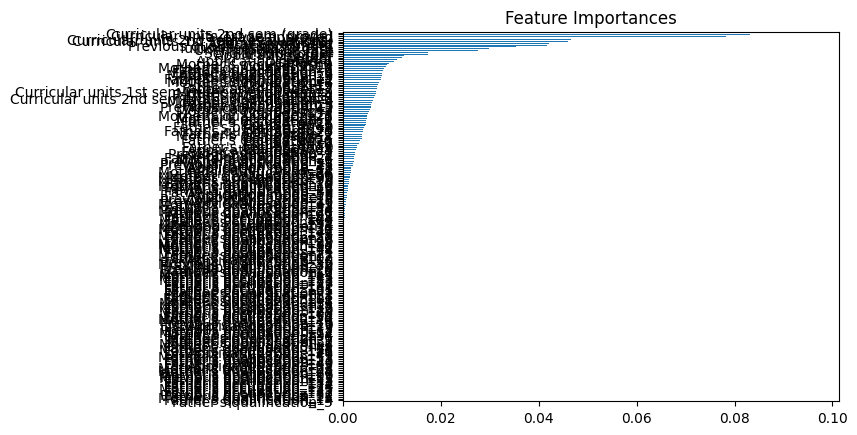

In [136]:
one_hot_columns = ['Application mode', 'Course', 'Previous qualification', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation']

huh = pd.get_dummies(test, columns=one_hot_columns)

X = huh.drop('Target', axis=1)
y = huh['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [138]:
from sklearn.model_selection import train_test_split


# Assuming X and y are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# If you want to scale the data, you can use StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # If you need the data in tensor format for PyTorch

# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [206]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights = torch.FloatTensor(class_weights).to(device)

# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, hidden_size//2),
            nn.BatchNorm1d(hidden_size//2),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(hidden_size//2, num_classes)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x

# Set device

# Initialize model
model = MLP(X_train.shape[1], 256, 3).to(device)

# First, convert all data to numeric format
# Assuming X_train and X_test are pandas DataFrames
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

# Then convert to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

# Loss and optimizer
# criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001,)

# Initialize metric storage
train_losses = []
test_losses = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1s = []
test_f1s = []
train_accuracies = []
test_accuracies = []

In [207]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings

warnings.filterwarnings('ignore')

num_epochs = 500

best_test_loss = float('inf')
best_epoch = 0
model_weights = None

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    train_outputs = model(X_train_tensor)
    train_loss = criterion(train_outputs, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    # Calculate training metrics
    _, train_predicted = torch.max(train_outputs.data, 1)
    train_losses.append(train_loss.item())
    train_precisions.append(precision_score(y_train_tensor.cpu(), train_predicted.cpu(), average='weighted'))
    train_recalls.append(recall_score(y_train_tensor.cpu(), train_predicted.cpu(), average='weighted'))
    train_f1s.append(f1_score(y_train_tensor.cpu(), train_predicted.cpu(), average='weighted'))
    train_accuracies.append(accuracy_score(y_train_tensor.cpu(), train_predicted.cpu()))

    # Calculate test metrics
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        _, test_predicted = torch.max(test_outputs.data, 1)
        
        test_losses.append(test_loss.item())
        test_precisions.append(precision_score(y_test_tensor.cpu(), test_predicted.cpu(), average='weighted'))
        test_recalls.append(recall_score(y_test_tensor.cpu(), test_predicted.cpu(), average='weighted'))
        test_f1s.append(f1_score(y_test_tensor.cpu(), test_predicted.cpu(), average='weighted'))
        test_accuracies.append(accuracy_score(y_test_tensor.cpu(), test_predicted.cpu()))

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_epoch = epoch
            model_weights = model.state_dict()

    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train - Loss: {train_loss.item():.4f}, Accuracy: {train_accuracies[-1]:.4f}')
        print(f'Test - Loss: {test_loss.item():.4f}, Accuracy: {test_accuracies[-1]:.4f}')

print(f'Best test loss: {best_test_loss} at epoch {best_epoch}')
print(f'Best test accuracy: {test_accuracies[best_epoch]}')
print(f'Best test precision: {test_precisions[best_epoch]}')
print(f'Best test recall: {test_recalls[best_epoch]}')
print(f'Best test F1: {test_f1s[best_epoch]}')

# Load the best model weights
model.load_state_dict(model_weights)

Epoch [100/500]
Train - Loss: 0.4522, Accuracy: 0.8296
Test - Loss: 0.6710, Accuracy: 0.7232
Epoch [200/500]
Train - Loss: 0.2959, Accuracy: 0.8890
Test - Loss: 0.8008, Accuracy: 0.7220
Epoch [300/500]
Train - Loss: 0.2255, Accuracy: 0.9135
Test - Loss: 0.9398, Accuracy: 0.7107
Epoch [400/500]
Train - Loss: 0.1780, Accuracy: 0.9322
Test - Loss: 1.0374, Accuracy: 0.7051
Epoch [500/500]
Train - Loss: 0.1431, Accuracy: 0.9491
Test - Loss: 1.1309, Accuracy: 0.7051
Best test loss: 0.6492129564285278 at epoch 67
Best test accuracy: 0.7288135593220338
Best test precision: 0.7319900331148288
Best test recall: 0.7288135593220338
Best test F1: 0.7232952246151283


<All keys matched successfully>

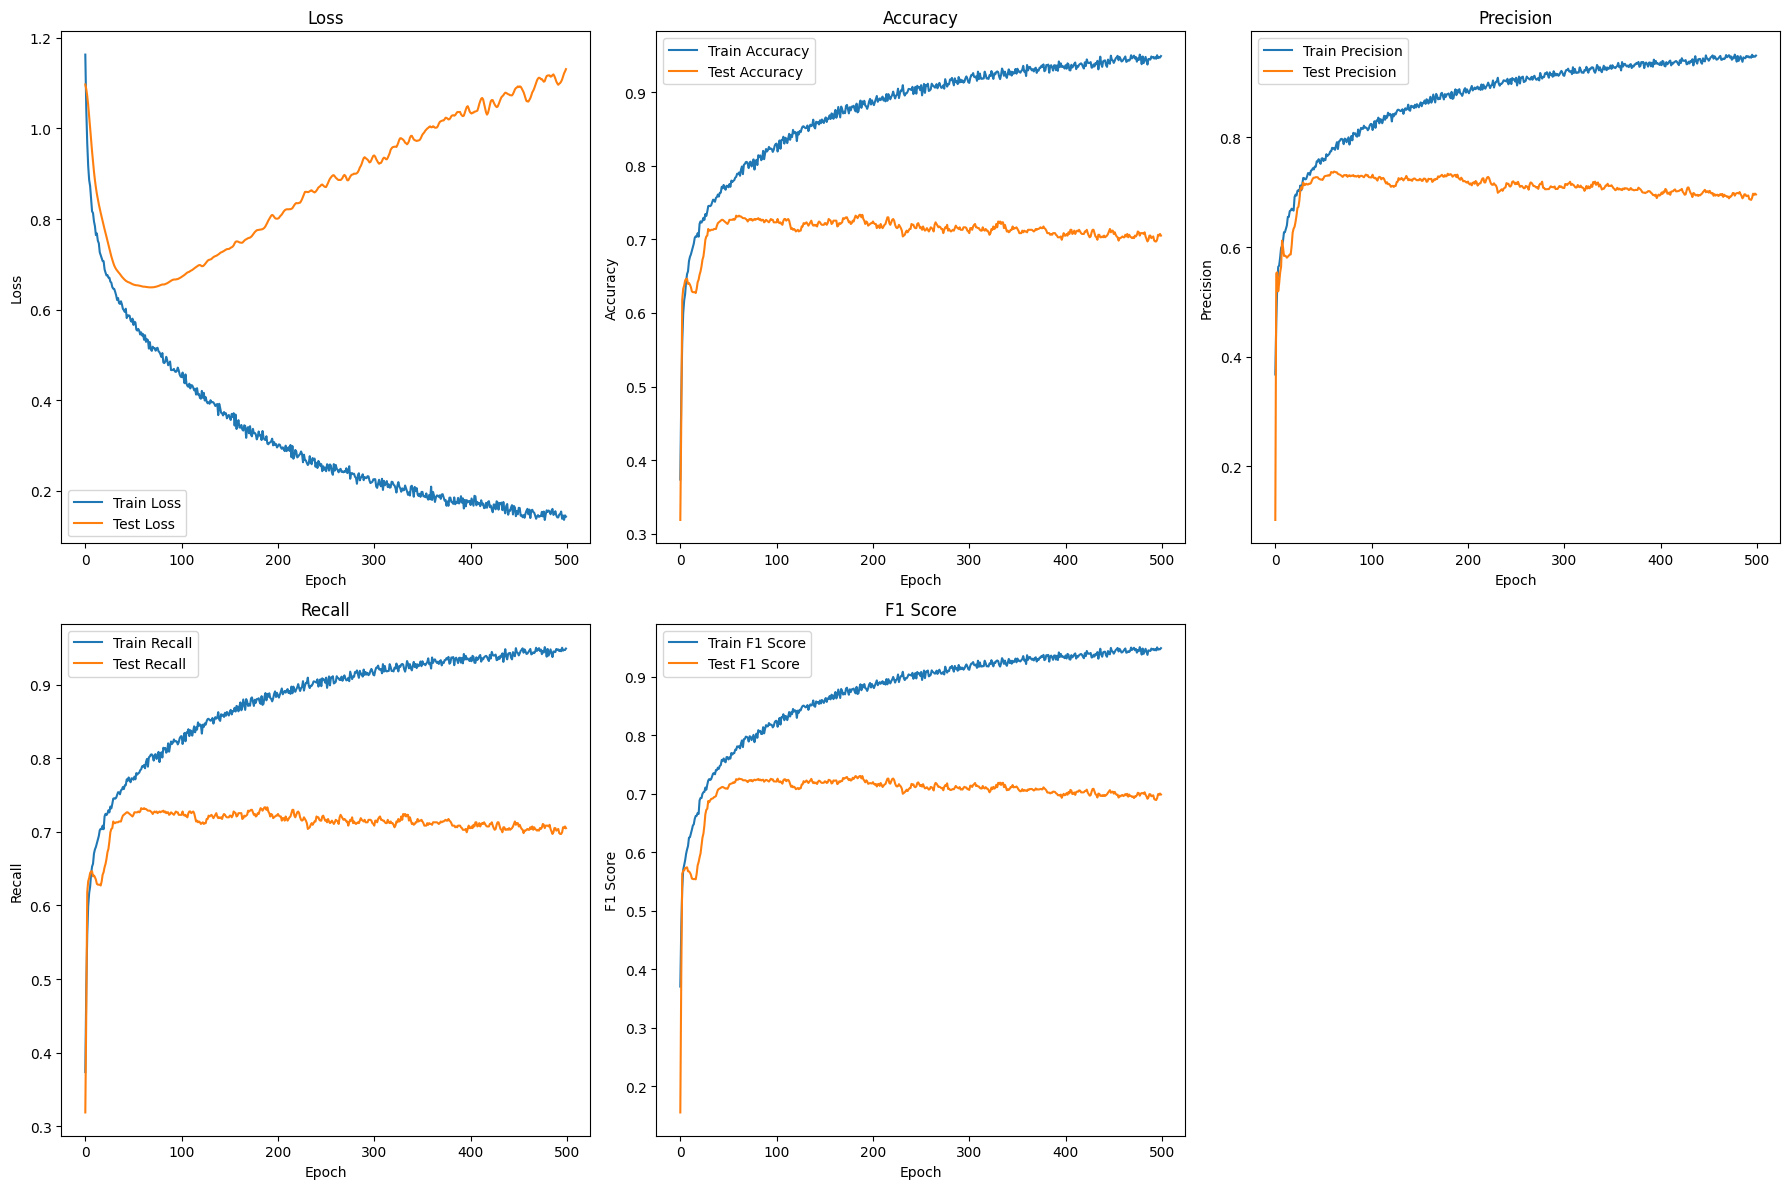

In [208]:
import matplotlib.pyplot as plt

# Create a 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot training and testing losses
axes[0, 0].plot(train_losses, label='Train Loss')
axes[0, 0].plot(test_losses, label='Test Loss')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Plot training and testing accuracies
axes[0, 1].plot(train_accuracies, label='Train Accuracy')
axes[0, 1].plot(test_accuracies, label='Test Accuracy')
axes[0, 1].set_title('Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Plot training and testing precisions
axes[0, 2].plot(train_precisions, label='Train Precision')
axes[0, 2].plot(test_precisions, label='Test Precision')
axes[0, 2].set_title('Precision')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Precision')
axes[0, 2].legend()

# Plot training and testing recalls
axes[1, 0].plot(train_recalls, label='Train Recall')
axes[1, 0].plot(test_recalls, label='Test Recall')
axes[1, 0].set_title('Recall')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].legend()

# Plot training and testing F1 scores
axes[1, 1].plot(train_f1s, label='Train F1 Score')
axes[1, 1].plot(test_f1s, label='Test F1 Score')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].legend()

# Hide the last subplot (bottom right)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

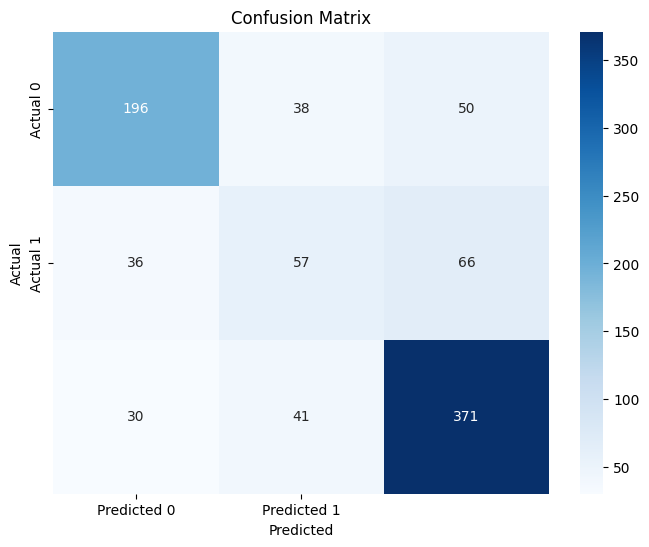

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
y_true = y_test_tensor.cpu().numpy()
y_pred = test_predicted.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()